<a href="https://colab.research.google.com/github/pawljmlo/covid-ur-wasting/blob/main/wasting-anaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import numpy as np

import math

In [40]:
path_overlapping = "/content/drive/MyDrive/projekty/review-ai-covid-ur/data/covid-data-extracted-overlapping.csv"

In [42]:
df = pd.read_csv(path_overlapping)

## basic editing

In [43]:
df.head()

,Reference ID,ID in the review,..Primary study Bibtex ID,Num,Per one,New,Reference,Medium,What,Link,Ver. reported?,Date\nreported,Versions,Ver. Used,Month,Day,Published?,Pub-link,Journal,Conference,Other,Av-Month,Av-Day,Av-Year,Retracted,How many datasets were used?,Total CTs,C-19 CTs,Total \nX-Rays,C-19 \nX-rays,Total other,C-19 other,Viral pneumonia\n(non-COVID),Bacterial pneumonia,Unknown pneumonia,Unclear,Asymptomatic controls,Control patients,C-19 patients,Total patients,Architecture name,Architecture modification,Accuracy,AUC,F1\nDSC\nDice Score\nDSC\nm-DICE,Precision\nPPV,NPV,Sensitivity\nRecall,Specifity,Balanced Accuracy,Other \nmetrics,Post processing,sens+\nspec,both\nscans,"sens,spec,both",CT,X-ray,Other.1
0,chen2020review,15,abbas2020classification,1.0,6.0,NaN,"Asmaa A., Mohammed M. A., Mohamed M. G.:Classi...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"3, N",0,0,196,106,0,0,1.0,0.0,0.0,1,0,NR,NR,NR,AlexNet,NR,9512,9415,NR,NR,NR,NR,NR,NR,NR,NR,0,1,0.0,#DZIEL/0!,"0,540816326530612",#DZIEL/0!
1,islam2020review,91,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, “...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,1.0,3,1,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, COVID-19 X-ray image database, Japanese Soc...",0,0,196,105,0,0,0.0,0.0,0.0,"1, sars",1,NR,NR,NR,DeTraC-ResNet18,2\3,9512,NR,NR,9336,NR,9791,9187,NR,NR,NR,2,1,1.0,#DZIEL/0!,"0,535714285714286",#DZIEL/0!
2,nguyen2020artificial,46,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, “...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"3, N",NR,NR,NR,NR,0,0,0.0,0.0,0.0,1,0,NR,NR,NR,"ResNet18, DeTraC",NR,9512,NR,NR,NR,NR,9791,9187,NR,NR,NR,2,0,0.0,#VALUE!,#VALUE!,#DZIEL/0!
3,shoeibi2020automated,77,abbas2020classification,NaN,NaN,NaN,"Asmaa A., Mohammed M. A., Mohamed M. G.:Classi...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, N",0,0,NR,NR,0,0,1.0,0.0,0.0,0,1,NR,NR,NR,DeTraC (ResNet18),2,9512,NR,NR,NR,NR,9791,9187,NR,NR,"1, Composition Phase",2,0,0.0,#DZIEL/0!,#VALUE!,#DZIEL/0!
4,ulhaq2020computer,64->63,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, ‘...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, Japanese Society of Radiological Technology...",0,0,NR,NR,0,0,0.0,0.0,0.0,0,1,NR,NR,NR,"ResNet, ImageNet",NR,9512,NR,NR,9336,NR,9791,9187,NR,NR,NR,2,0,0.0,#DZIEL/0!,#VALUE!,#DZIEL/0!


In [44]:
df.columns

Index(['Reference ID', 'ID in the review', '..Primary study Bibtex ID', 'Num',
       'Per one', 'New', 'Reference', 'Medium', 'What', 'Link',
       'Ver. reported?', 'Date\nreported', 'Versions', 'Ver. Used', 'Month',
       'Day', 'Published?', 'Pub-link', 'Journal', 'Conference', 'Other',
       'Av-Month', 'Av-Day', 'Av-Year', 'Retracted',
       'How many datasets were used?', 'Total CTs', 'C-19 CTs',
       'Total \nX-Rays', 'C-19 \nX-rays', 'Total other', 'C-19 other',
       'Viral pneumonia\n(non-COVID)', 'Bacterial pneumonia',
       'Unknown pneumonia', 'Unclear', 'Asymptomatic controls',
       'Control patients', 'C-19 patients', 'Total patients',
       'Architecture name', 'Architecture modification', 'Accuracy', 'AUC',
       'F1\nDSC\nDice Score\nDSC\nm-DICE', 'Precision\nPPV', 'NPV',
       'Sensitivity\nRecall', 'Specifity', 'Balanced Accuracy',
       'Other \nmetrics', 'Post processing', 'sens+\nspec', 'both\nscans',
       'sens,spec,both', 'CT', 'X-ray', 'Other.

In [45]:
df.columns = ['Reference ID', 'ID in the review', 'Primary study Bibtex ID', 'Num', 'Per one', 'New', 'Reference', 'Medium', 'What', 'Link', 'Was ver. reported?', 
              'Date reported', 'Versions', 'Ver. Used', 'Month', 'Day', 'Published?', 'Pub-link', 'Journal', 'Conference', 'Other', 'Av-Month', 'Av-Day', 'Av-Year', 
              'Retracted', 'How many datasets were used?', 'Total CTs', 'C-19 CTs', 'Total X-Rays', 'C-19 X-rays', 'Total other', 'C-19 other', 'Viral pneumonia (non-COVID)', 
              'Bacterial pneumonia', 'Unknown pneumonia', 'Unclear', 'Asymptomatic controls', 'Control patients', 'C-19 patients', 'Total patients', 'Architecture name', 
              'Architecture modification', 'Accuracy', 'AUC', 'F1', 'Precision', 'NPV', 'Sensitivity', 'Specifity', 'Balanced Accuracy', 'Other metrics', 'Post processing', 
              'Sens. and Spec.', 'Both scans', 'Sens., Spec., Both', 'CT', 'X-ray', 'Other']

In [47]:
df.head()

,Reference ID,ID in the review,Primary study Bibtex ID,Num,Per one,New,Reference,Medium,What,Link,Was ver. reported?,Date reported,Versions,Ver. Used,Month,Day,Published?,Pub-link,Journal,Conference,Other,Av-Month,Av-Day,Av-Year,Retracted,How many datasets were used?,Total CTs,C-19 CTs,Total X-Rays,C-19 X-rays,Total other,C-19 other,Viral pneumonia (non-COVID),Bacterial pneumonia,Unknown pneumonia,Unclear,Asymptomatic controls,Control patients,C-19 patients,Total patients,Architecture name,Architecture modification,Accuracy,AUC,F1,Precision,NPV,Sensitivity,Specifity,Balanced Accuracy,Other metrics,Post processing,Sens. and Spec.,Both scans,"Sens., Spec., Both",CT,X-ray,Other
0,chen2020review,15,abbas2020classification,1.0,6.0,NaN,"Asmaa A., Mohammed M. A., Mohamed M. G.:Classi...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"3, N",0,0,196,106,0,0,1.0,0.0,0.0,1,0,NR,NR,NR,AlexNet,NR,9512,9415,NR,NR,NR,NR,NR,NR,NR,NR,0,1,0.0,#DZIEL/0!,"0,540816326530612",#DZIEL/0!
1,islam2020review,91,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, “...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,1.0,3,1,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, COVID-19 X-ray image database, Japanese Soc...",0,0,196,105,0,0,0.0,0.0,0.0,"1, sars",1,NR,NR,NR,DeTraC-ResNet18,2\3,9512,NR,NR,9336,NR,9791,9187,NR,NR,NR,2,1,1.0,#DZIEL/0!,"0,535714285714286",#DZIEL/0!
2,nguyen2020artificial,46,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, “...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"3, N",NR,NR,NR,NR,0,0,0.0,0.0,0.0,1,0,NR,NR,NR,"ResNet18, DeTraC",NR,9512,NR,NR,NR,NR,9791,9187,NR,NR,NR,2,0,0.0,#VALUE!,#VALUE!,#DZIEL/0!
3,shoeibi2020automated,77,abbas2020classification,NaN,NaN,NaN,"Asmaa A., Mohammed M. A., Mohamed M. G.:Classi...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, N",0,0,NR,NR,0,0,1.0,0.0,0.0,0,1,NR,NR,NR,DeTraC (ResNet18),2,9512,NR,NR,NR,NR,9791,9187,NR,NR,"1, Composition Phase",2,0,0.0,#DZIEL/0!,#VALUE!,#DZIEL/0!
4,ulhaq2020computer,64->63,abbas2020classification,NaN,NaN,NaN,"A. Abbas, M. M. Abdelsamea, and M. M. Gaber, ‘...",Preprint,Arxiv,https://arxiv.org/abs/2003.13815,0.0,0.0,3,U,3,26,1,https://link.springer.com/article/10.1007%2Fs1...,Applied Intelligence,NaN,NaN,9.0,5,2020.0,0.0,"2, Japanese Society of Radiological Technology...",0,0,NR,NR,0,0,0.0,0.0,0.0,0,1,NR,NR,NR,"ResNet, ImageNet",NR,9512,NR,NR,9336,NR,9791,9187,NR,NR,NR,2,0,0.0,#DZIEL/0!,#VALUE!,#DZIEL/0!


## inter-article agreement

In [269]:
review_ids = df['Reference ID'].unique()
review_ids.sort()

In [270]:
len(review_ids), review_ids

(22, array(['chen2020review', 'chen2020survey', 'cui2020diagnostic',
        'dong2020role', 'farhat2020deep', 'ilyas2020detection',
        'islam2020review', 'islam2020survey', 'ito2020review',
        'jalaber2020chest', 'kumar2020review', 'mohamadou2020review',
        'nguyen2020artificial', 'pham2020artificial', 'raj2020role',
        'roberts2020machine', 'salehi2020review', 'shaikh2020current',
        'shi2020review', 'shoeibi2020automated', 'ulhaq2020computer',
        'wynants2020prediction'], dtype=object))

In [328]:
df_agreement = pd.DataFrame(0, index=np.arange(len(review_ids)), columns=review_ids)
df_agreement.index = review_ids
df_agreement.head()

,chen2020review,chen2020survey,cui2020diagnostic,dong2020role,farhat2020deep,ilyas2020detection,islam2020review,islam2020survey,ito2020review,jalaber2020chest,kumar2020review,mohamadou2020review,nguyen2020artificial,pham2020artificial,raj2020role,roberts2020machine,salehi2020review,shaikh2020current,shi2020review,shoeibi2020automated,ulhaq2020computer,wynants2020prediction
chen2020review,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chen2020survey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
cui2020diagnostic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dong2020role,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
farhat2020deep,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [329]:
df_agreement_cases = pd.DataFrame(0, index=np.arange(len(review_ids)), columns=review_ids)
df_agreement_cases.index = review_ids

In [330]:
def check_col_apply(col):
  global sum_frame
  global sum_nr
  global sum_agreed_nr 

  unique_elements = col.unique()
  
  sum_frame += len(unique_elements)
  if 'NR' in unique_elements:
    sum_nr += 1
  if 'NR' in unique_elements and not (len(unique_elements) == 2):
    sum_agreed_nr += 1

col_apply = ['How many datasets were used?', 'Total CTs', 'C-19 CTs', 'Total X-Rays', 'C-19 X-rays', 'Total other', 'C-19 other', 'Viral pneumonia (non-COVID)', 
              'Bacterial pneumonia', 'Unknown pneumonia', 'Unclear', 'Asymptomatic controls', 'Control patients', 'C-19 patients', 'Total patients', 'Architecture name', 
              'Architecture modification', 'Accuracy', 'AUC', 'F1', 'Precision', 'NPV', 'Sensitivity', 'Specifity', 'Balanced Accuracy', 'Other metrics', 'Post processing']

col_apply = ['Total CTs', 'C-19 CTs', 'Total X-Rays', 'C-19 X-rays', 'Total other', 'C-19 other', 'Viral pneumonia (non-COVID)', 
              'Bacterial pneumonia', 'Unknown pneumonia', 'Unclear', 'Asymptomatic controls', 'Control patients', 'C-19 patients', 'Total patients', 
              'Architecture modification', 'Accuracy', 'AUC', 'F1', 'Precision', 'NPV', 'Sensitivity', 'Specifity', 'Balanced Accuracy', 'Other metrics']

In [331]:
nr = True

In [332]:
sum_single = 0
sum_more_models = 0
sum_comparison = 0

for id, group in df.groupby('Primary study Bibtex ID'):
  # print(id)

  group.sort_values('Reference ID')
  
  if not (group.shape[0] == len(group['Reference ID'].unique())):
    sum_more_models +=1 
    # print(id, group.shape[0], len(group['Reference ID'].unique()))
    continue

  if (group.shape[0] == 1):
    sum_single += 1
    # print(id, group.shape[0], len(group['Reference ID'].unique()))
    continue

  sum_comparison += 1

  for i, row in group.iterrows():

    for j, row_in_row in group.iterrows():
      if not (j > i):
        continue

      global sum_frame
      global sum_nr
      global sum_agreed_nr
      sum_frame = 0
      sum_nr = 0
      sum_agreed_nr = 0
      
      frame = group.loc[(group['Reference ID'] == row['Reference ID']) | (group['Reference ID'] == row_in_row['Reference ID']), col_apply]
      frame.apply(lambda c: check_col_apply(c))

      if nr:
        df_agreement.loc[row['Reference ID'], row_in_row['Reference ID']] += abs(sum_frame - sum_agreed_nr - 2*(sum_nr - sum_agreed_nr) - 2*(len(col_apply) - (sum_nr)))
        df_agreement_cases.loc[row['Reference ID'], row_in_row['Reference ID']] += (len(col_apply) - sum_nr)
      else:
        df_agreement.loc[row['Reference ID'], row_in_row['Reference ID']] += abs(sum_frame - 2*len(col_apply))
        # print(abs(sum_frame - 2*len(col_apply)))
        df_agreement_cases.loc[row['Reference ID'], row_in_row['Reference ID']] += len(col_apply)

print("Single studies:", sum_single)
print("Multiple models:", sum_more_models)
print("To comparison:", sum_comparison)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # This is added back by InteractiveShellApp.init_path()


Single studies: 73
Multiple models: 27
To comparison: 65


In [333]:
df_agreement.head()

,chen2020review,chen2020survey,cui2020diagnostic,dong2020role,farhat2020deep,ilyas2020detection,islam2020review,islam2020survey,ito2020review,jalaber2020chest,kumar2020review,mohamadou2020review,nguyen2020artificial,pham2020artificial,raj2020role,roberts2020machine,salehi2020review,shaikh2020current,shi2020review,shoeibi2020automated,ulhaq2020computer,wynants2020prediction
chen2020review,0,66,0,58,6,8,119,20,60,0,22,11,49,43,0,60,10,0,65,250,75,45
chen2020survey,0,0,0,44,0,8,45,10,53,0,28,32,38,20,0,12,12,0,53,27,54,36
cui2020diagnostic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dong2020role,0,0,0,0,0,0,40,7,51,0,15,7,36,14,0,18,11,13,64,26,53,30
farhat2020deep,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,8,0,0,0,32,0,0


In [334]:
df_agreement_cases.head()

,chen2020review,chen2020survey,cui2020diagnostic,dong2020role,farhat2020deep,ilyas2020detection,islam2020review,islam2020survey,ito2020review,jalaber2020chest,kumar2020review,mohamadou2020review,nguyen2020artificial,pham2020artificial,raj2020role,roberts2020machine,salehi2020review,shaikh2020current,shi2020review,shoeibi2020automated,ulhaq2020computer,wynants2020prediction
chen2020review,0,95,0,67,10,12,155,21,81,0,34,21,63,51,0,82,12,0,80,339,98,65
chen2020survey,0,0,0,58,0,12,64,12,93,0,36,35,46,32,0,14,12,0,79,46,71,50
cui2020diagnostic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dong2020role,0,0,0,0,0,0,53,7,73,0,25,11,47,15,0,23,13,13,81,33,66,53
farhat2020deep,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,11,0,0,0,41,0,0


In [335]:
df_agreement_percent = df_agreement / df_agreement_cases * 100
df_agreement_percent.head()

,chen2020review,chen2020survey,cui2020diagnostic,dong2020role,farhat2020deep,ilyas2020detection,islam2020review,islam2020survey,ito2020review,jalaber2020chest,kumar2020review,mohamadou2020review,nguyen2020artificial,pham2020artificial,raj2020role,roberts2020machine,salehi2020review,shaikh2020current,shi2020review,shoeibi2020automated,ulhaq2020computer,wynants2020prediction
chen2020review,NaN,69.473684,NaN,86.567164,60.0,66.666667,76.774194,95.238095,74.074074,NaN,64.705882,52.380952,77.777778,84.313725,NaN,73.170732,83.333333,NaN,81.250000,73.746313,76.530612,69.230769
chen2020survey,NaN,NaN,NaN,75.862069,NaN,66.666667,70.312500,83.333333,56.989247,NaN,77.777778,91.428571,82.608696,62.500000,NaN,85.714286,100.000000,NaN,67.088608,58.695652,76.056338,72.000000
cui2020diagnostic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dong2020role,NaN,NaN,NaN,NaN,NaN,NaN,75.471698,100.000000,69.863014,NaN,60.000000,63.636364,76.595745,93.333333,NaN,78.260870,84.615385,100.0,79.012346,78.787879,80.303030,56.603774
farhat2020deep,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.727273,NaN,NaN,NaN,78.048780,NaN,NaN


### visualise

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

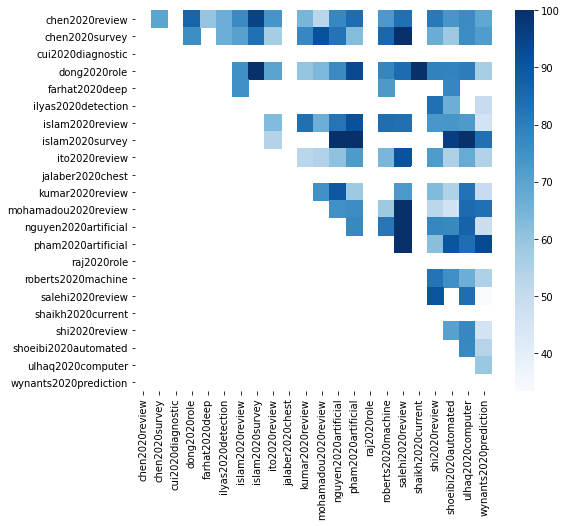

In [337]:
plt.figure(figsize=(8,7))
sns.heatmap(df_agreement_percent, cmap='Blues')

In [339]:
df_agreement_percent[df_agreement_percent >= 90].count()

chen2020review           0
chen2020survey           0
cui2020diagnostic        0
dong2020role             0
farhat2020deep           0
ilyas2020detection       0
islam2020review          0
islam2020survey          2
ito2020review            0
jalaber2020chest         0
kumar2020review          0
mohamadou2020review      1
nguyen2020artificial     1
pham2020artificial       3
raj2020role              0
roberts2020machine       0
salehi2020review         5
shaikh2020current        1
shi2020review            1
shoeibi2020automated     2
ulhaq2020computer        1
wynants2020prediction    1
dtype: int64

In [340]:
df_agreement_percent.mean()

chen2020review                  NaN
chen2020survey            69.473684
cui2020diagnostic               NaN
dong2020role              81.214617
farhat2020deep            60.000000
ilyas2020detection        66.666667
islam2020review           74.389598
islam2020survey           92.857143
ito2020review             63.535143
jalaber2020chest                NaN
kumar2020review           67.689714
mohamadou2020review       67.233045
nguyen2020artificial      80.620783
pham2020artificial        79.567807
raj2020role                     NaN
roberts2020machine        74.779870
salehi2020review          90.590408
shaikh2020current        100.000000
shi2020review             73.771434
shoeibi2020automated      71.137938
ulhaq2020computer         79.814734
wynants2020prediction     59.555691
dtype: float64

In [341]:
df_agreement_percent.describe()

,chen2020review,chen2020survey,cui2020diagnostic,dong2020role,farhat2020deep,ilyas2020detection,islam2020review,islam2020survey,ito2020review,jalaber2020chest,kumar2020review,mohamadou2020review,nguyen2020artificial,pham2020artificial,raj2020role,roberts2020machine,salehi2020review,shaikh2020current,shi2020review,shoeibi2020automated,ulhaq2020computer,wynants2020prediction
count,0.0,1.000000,0.0,2.000000,1.0,2.000000,4.000000,3.000000,5.000000,0.0,5.000000,6.000000,8.000000,9.000000,0.0,8.000000,9.000000,1.0,12.000000,14.000000,14.000000,16.000000
mean,NaN,69.473684,NaN,81.214617,60.0,66.666667,74.389598,92.857143,63.535143,NaN,67.689714,67.233045,80.620783,79.567807,NaN,74.779870,90.590408,100.0,73.771434,71.137938,79.814734,59.555691
std,NaN,NaN,NaN,7.569645,NaN,0.000000,2.819725,8.584646,8.488751,NaN,12.661697,14.472208,11.435923,14.074405,NaN,9.653524,10.092040,NaN,11.001393,13.912268,8.542875,16.305223
min,NaN,69.473684,NaN,75.862069,60.0,66.666667,70.312500,83.333333,53.846154,NaN,52.631579,52.380952,60.784314,58.333333,NaN,58.333333,72.727273,100.0,52.173913,46.153846,66.666667,33.333333
25%,NaN,69.473684,NaN,78.538343,60.0,66.666667,73.828125,89.285714,56.989247,NaN,60.000000,56.623377,76.196809,72.500000,NaN,70.616883,83.333333,100.0,66.105929,60.688406,76.174907,49.662162
50%,NaN,69.473684,NaN,81.214617,60.0,66.666667,75.235849,95.238095,62.903226,NaN,64.705882,65.151515,80.116959,77.272727,NaN,75.715801,91.304348,100.0,75.764706,73.777918,79.040404,54.502688
75%,NaN,69.473684,NaN,83.890890,60.0,66.666667,75.797322,97.619048,69.863014,NaN,77.777778,72.916667,84.392419,91.666667,NaN,82.345779,100.000000,100.0,81.589674,77.854767,84.035924,69.923077
max,NaN,69.473684,NaN,86.567164,60.0,66.666667,76.774194,100.000000,74.074074,NaN,83.333333,91.428571,100.000000,100.000000,NaN,85.714286,100.000000,100.0,90.909091,96.428571,100.000000,93.333333


In [348]:
df_agreement_percent_full = (df_agreement_percent.transpose().fillna(0) + df_agreement_percent.fillna(0)).replace(0, np.nan)

In [349]:
df_agreement_percent_full.describe()

,chen2020review,chen2020survey,cui2020diagnostic,dong2020role,farhat2020deep,ilyas2020detection,islam2020review,islam2020survey,ito2020review,jalaber2020chest,kumar2020review,mohamadou2020review,nguyen2020artificial,pham2020artificial,raj2020role,roberts2020machine,salehi2020review,shaikh2020current,shi2020review,shoeibi2020automated,ulhaq2020computer,wynants2020prediction
count,17.000000,16.000000,0.0,16.000000,4.000000,5.000000,15.000000,9.000000,15.000000,0.0,13.000000,14.000000,15.000000,14.000000,0.0,12.000000,12.000000,1.0,15.000000,16.000000,15.000000,16.000000
mean,74.425528,74.781714,NaN,78.682042,71.444013,66.666667,74.481499,90.242165,64.177083,NaN,68.062558,69.991235,79.662338,81.844563,NaN,73.175884,85.285589,100.0,71.953800,70.406427,78.433146,59.555691
std,10.391892,11.792256,NaN,12.615080,7.934738,11.785113,10.902838,15.265262,10.671828,NaN,13.001556,16.386412,13.011855,14.056341,NaN,10.212207,18.588183,NaN,12.206918,13.794827,9.818330,16.305223
min,52.380952,56.989247,NaN,56.603774,60.000000,50.000000,45.588235,53.846154,52.631579,NaN,50.000000,46.153846,48.648649,58.333333,NaN,54.838710,33.333333,100.0,45.901639,46.153846,59.090909,33.333333
25%,69.230769,66.983122,NaN,74.069527,69.545455,66.666667,71.380740,83.333333,54.774436,NaN,58.333333,55.297619,76.934236,73.422619,NaN,66.071429,83.333333,100.0,65.123251,57.837529,74.252659,49.662162
50%,74.074074,73.931034,NaN,78.524374,73.863636,66.666667,75.000000,96.428571,62.903226,NaN,64.705882,70.833333,78.000000,84.202317,NaN,74.464154,87.762238,100.0,73.529412,73.777918,77.777778,54.502688
75%,81.250000,82.789855,NaN,85.103330,75.762195,66.666667,82.894737,100.000000,71.076085,NaN,77.777778,81.547619,84.782609,92.916667,NaN,82.015810,100.000000,100.0,80.131173,77.466741,83.980938,69.923077
max,95.238095,100.000000,NaN,100.000000,78.048780,83.333333,91.666667,100.000000,91.304348,NaN,89.743590,100.000000,100.000000,100.000000,NaN,85.714286,100.000000,100.0,90.909091,96.428571,100.000000,93.333333


In [351]:
df_agreement_percent_full[df_agreement_percent_full >= 90].count()

chen2020review           1
chen2020survey           2
cui2020diagnostic        0
dong2020role             3
farhat2020deep           0
ilyas2020detection       0
islam2020review          1
islam2020survey          6
ito2020review            1
jalaber2020chest         0
kumar2020review          0
mohamadou2020review      2
nguyen2020artificial     2
pham2020artificial       6
raj2020role              0
roberts2020machine       0
salehi2020review         6
shaikh2020current        1
shi2020review            1
shoeibi2020automated     2
ulhaq2020computer        1
wynants2020prediction    1
dtype: int64